# TP2
15k statuts Facebook, extraites de 15k profils Facebook différents, antérieurs à avril 2015 (date de basculement à la v2 de l'API Graph). Chaque ligne contient un post, en format json. 

**L'objectif du TP** est de tenter de faire le lien entre métadonnées et catégories de posts, en lisant des posts.

In [1]:
%matplotlib inline

In [2]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
feed = []
for line in open('st.jsons', 'r', encoding='utf8'):
    feed.append(json.loads(line))

### Question 1
Observer les valeurs possibles du champ type, produire un histogramme de toute les valeurs

In [18]:
status_type = {}
for item in feed:
    for t in item['type']:
        if t in status_type:
            status_type[t] += 1
        else:
            status_type[t] = 1
            
keys = [key for key in status_type]
values = [status_type[key] for key in status_type]

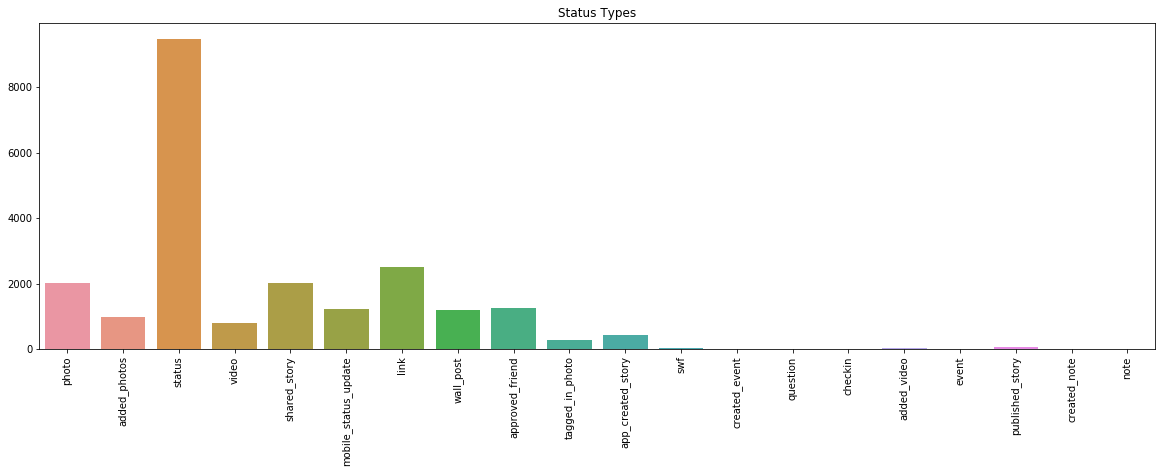

In [23]:
fig = plt.figure(figsize=(20,6))
b = sns.barplot(x=keys, y=values)
b.set_xticklabels(b.get_xticklabels(), rotation=90)
b.set_title("Status Types")
plt.show()

### Question 2
Énumérer toutes les *combinaisons* de types de posts (puisqu'un post peut avoir plusieurs types)

In [28]:
status_type = {}
for item in feed:
        if "+".join(item['type']) in status_type:
            status_type["+".join(item['type'])] += 1
        else:
            status_type["+".join(item['type'])] = 1
            
keys = [key for key in status_type]
values = [status_type[key] for key in status_type]

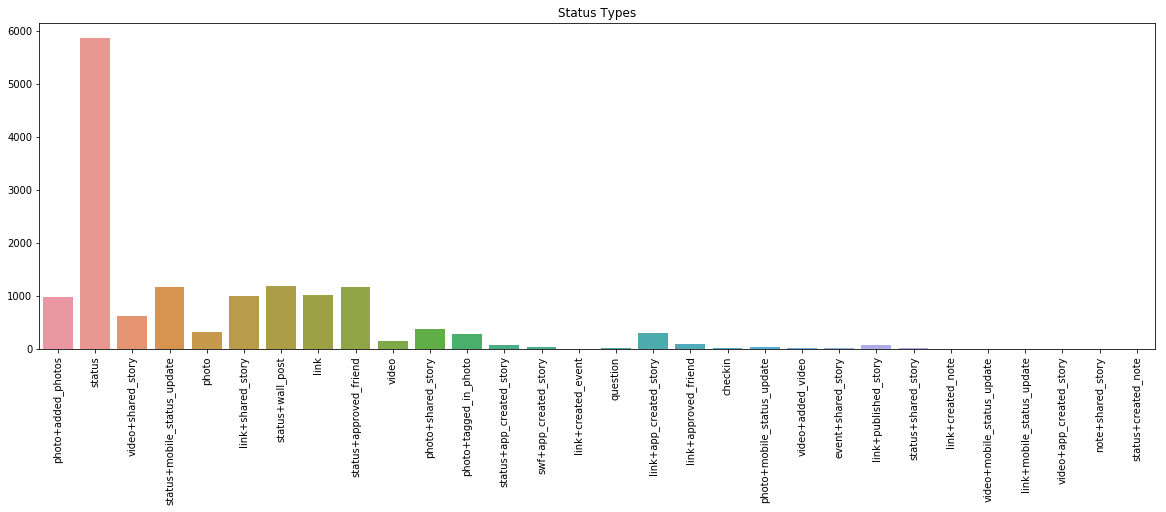

In [29]:
fig = plt.figure(figsize=(20,6))
b = sns.barplot(x=keys, y=values)
b.set_xticklabels(b.get_xticklabels(), rotation=90)
b.set_title("Status Types")
plt.show()

### Question 3
Tenter d'énumérer les valeurs possibles du champ *type* associées à un post contenant uniquement du texte (un "status update"), donc pas un lien. Déterminer si ces valeurs sont suffisantes pour caractériser cette catégorie de posts.

In [30]:
status_type = {}
for item in feed:
    if ('status' in ''.join(item['type'])) & ('link' not in item):
        if " ".join(item['type']) in status_type:
            status_type[" ".join(item['type'])] += 1
        else:
            status_type[" ".join(item['type'])] = 1
            
keys = [key for key in status_type]
values = [status_type[key] for key in status_type]

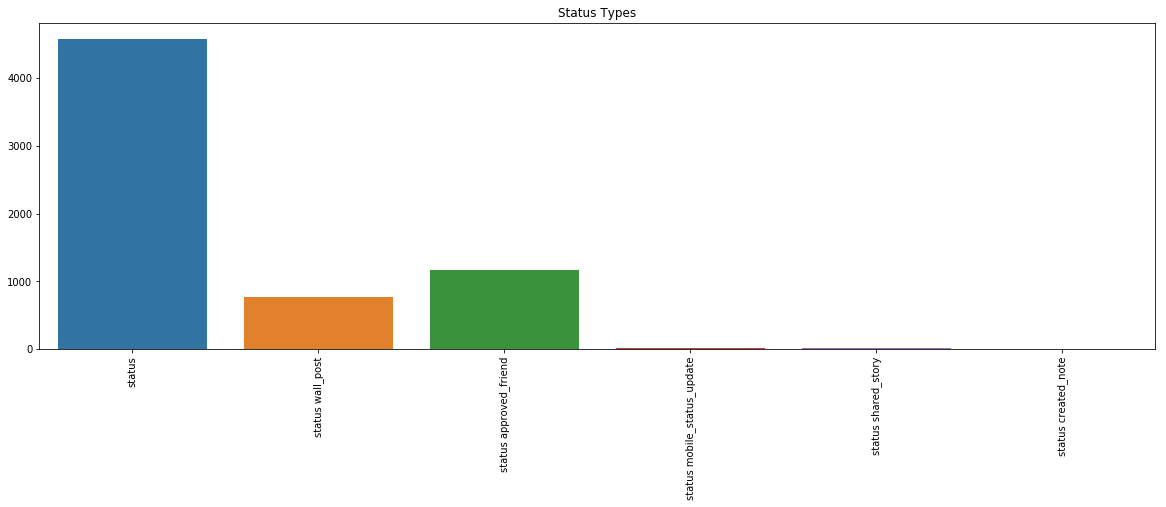

In [31]:
fig = plt.figure(figsize=(20,6))
b = sns.barplot(x=keys, y=values)
b.set_xticklabels(b.get_xticklabels(), rotation=90)
b.set_title("Status Types")
plt.show()

### Question 4
Vérifier que le type "approved_friend" ne caractérise pas tous les posts annonçant l'apparition de nouveaux amis.

In [39]:
feed
res = []
for item in feed:
    if 'story' in item:
        if ('amis' in item['story']) & ('approved_friend' not in item['type']):
            res.append(item)

print("Number of posts of new friends without \'approved_friend\': "+str(len(res)))
print(" ")
print("Example: "+str(res[:1]))

Number of posts of new friends without 'approved_friend': 194
 
Example: [{'story_tags': [[{'type': 'user', 'id': '0017a9594e0e1a68c22c632550aaea69'}], [{'type': 'user', 'id': 'fe99a0c1421df2136808d6332e19bf05'}]], 'story': ' 0017a959 et fe99a0c1 sont désormais amis.', 'tags': [{'id': 'fe99a0c1421df2136808d6332e19bf05'}], 'id': 'f02ee68920dcd4add2af6a91174488d3a18f267a3856962a3a96daa2840707f3', 'from': {'id': '0017a9594e0e1a68c22c632550aaea69'}, 'created': 1322501341000, 'updated': 1322501341000, 'type': ['status']}]
